In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import time
import pickle
import fasttext
ft = fasttext.load_model('./fasttext/cc.fr.300.bin')
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('../set_train_simple/data_model/full.csv')

In [3]:
start_time = time.time()
vectors = []
for i,titre in enumerate (df["titre"]):
    v = []
    if i % 1000==0:
        print(i)
    for token in str(titre).split():
        v.append(ft.get_word_vector(str(token)))
    vectors.append(np.mean(np.array(v),axis=0))
df['vector']=vectors
print("--- %s seconds ---" % (time.time() - start_time))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


317000
318000
319000
320000
321000
322000
323000
324000
325000
326000
327000
328000
329000
330000
331000
332000
333000
334000
335000
336000
337000
338000
339000
340000
341000
342000
343000
344000
345000
346000
347000
348000
349000
350000
351000
352000
353000
354000
355000
356000
357000
358000
359000
360000
361000
362000
363000
364000
365000
366000
367000
368000
369000
370000
371000
372000
373000
374000
375000
376000
377000
378000
379000
380000
381000
382000
383000
384000
385000
386000
387000
388000
389000
390000
391000
392000
393000
394000
395000
396000
397000
398000
399000
400000
401000
402000
403000
404000
405000
406000
407000
408000
409000
410000
411000
412000
413000
414000
415000
416000
417000
418000
419000
420000
421000
422000
423000
424000
425000
426000
427000
428000
429000
430000
431000
432000
433000
434000
435000
436000
437000
438000
439000
440000
441000
442000
443000
444000
445000
446000
447000
448000
449000
450000
451000
452000
453000
454000
455000
456000
457000
458000
459000

In [4]:
df20p = df.sample(n=int(len(df)/5),random_state=56)

In [5]:
df20p.type.value_counts()

actu         221501
people        26937
science        9636
parodique      2026
satirique      1012
Name: type, dtype: int64

In [6]:
df20p.vector

936374     [-0.0025207426, 0.016271193, 0.0013810539, -0....
831969     [0.0018361496, 0.00264784, -0.009224324, -0.02...
1300846    [0.019023053, -0.006644914, -0.00081983703, -0...
857905     [0.0020750344, 0.005345469, -0.030968852, 0.00...
471231     [0.0027761455, -0.030912513, 0.019153807, -0.0...
                                 ...                        
647242     [0.050144784, -0.03138473, -0.01103515, -0.031...
1182314    [-0.024711248, -0.015884796, 0.025998313, -0.0...
554898     [0.022781333, -0.008046287, 0.012149313, -0.00...
868562     [0.02151116, 0.056498807, 0.01479458, 0.023911...
406959     [-0.0030138597, 0.018338213, -0.0026652084, 0....
Name: vector, Length: 261112, dtype: object

In [7]:
print(df20p[df20p['vector'].apply(lambda x: str(type(x)) != "<class 'numpy.ndarray'>")])

               date titre  type vector
316807   2018-12-07        actu    NaN
1116743  2018-07-11        actu    NaN


In [8]:
str(type(df20p['vector'][0]))

"<class 'numpy.ndarray'>"

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df20p.copy().dropna(), test_size=(1/3), random_state=0)

X_train = np.array(np.stack(train["vector"]))
y_train = train['type']

X_test = np.array(np.stack(test["vector"]))
y_test = test['type']

In [10]:
from sklearn.neural_network import MLPClassifier
start_time = time.time()
clf = MLPClassifier(random_state=1, max_iter=200, hidden_layer_sizes=(30,15),alpha=0.01).fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 954.7221298217773 seconds ---


In [11]:
from sklearn.metrics import confusion_matrix , accuracy_score
y_pred_train = clf.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)

accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy:',accuracy)

Accuracy: 0.9332310626953484


In [36]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
#sns.set_theme(style="ticks")

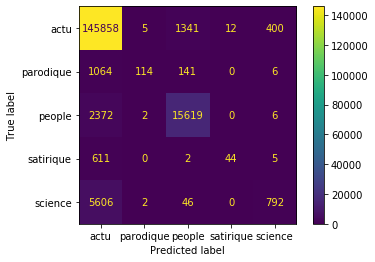

In [45]:
plot_confusion_matrix(clf,X_train,y_train)

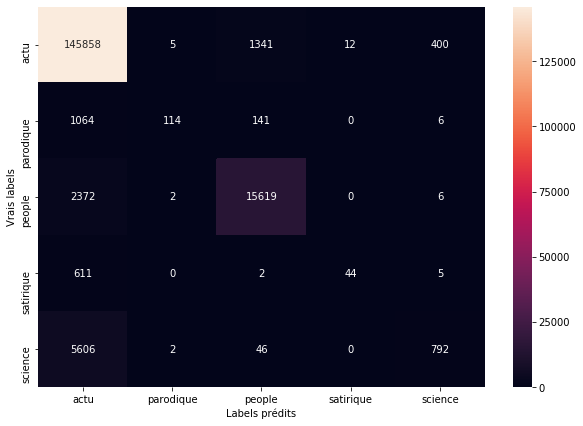

In [49]:
df_cm = pd.DataFrame(cm_train, index = [i for i in clf.classes_],
                  columns = [i for i in clf.classes_])
plt.figure(figsize = (10,7))
ax = sns.heatmap(df_cm,annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_ylabel("Vrais labels")
ax.set_xlabel("Labels prédits")
plt.show()

In [50]:
y_pred_test = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)

#accuracy_score(y_train,y_pred_train)
print('Accuracy:', accuracy_score(y_test,y_pred_test))

Accuracy: 0.9234357943119793


In [52]:
print('F1_scores:', f1_score(y_train,y_pred_train, average=None))
print('F1_scores:', f1_score(y_train,y_pred_train, average='macro'))

F1_scores: [0.96235571 0.15745856 0.88875612 0.12256267 0.20692358]
F1_scores: 0.46761132925474624


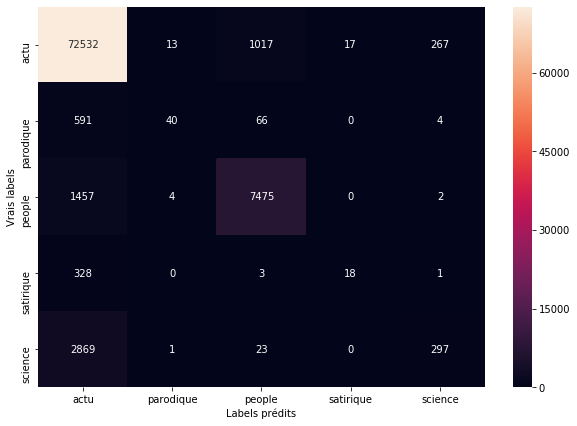

In [51]:
df_cm = pd.DataFrame(cm_test, index = [i for i in clf.classes_],
                  columns = [i for i in clf.classes_])
plt.figure(figsize = (10,7))
ax = sns.heatmap(df_cm,annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_ylabel("Vrais labels")
ax.set_xlabel("Labels prédits")
plt.show()

In [102]:
print('F1_scores:', f1_score(y_test,y_pred_test, average=None))
print('F1_scores:', f1_score(y_test,y_pred_test, average='macro'))

F1_scores: [0.95674139 0.10540184 0.8532131  0.09350649 0.15793672]
F1_scores: 0.4333599104002076


In [94]:
#pickle.dump(clf, open('models/model20p_full.pkl','wb'))

In [ ]:
#trop long
#df.to_csv(index=False ,path_or_buf='../set_train_simple/data_model/full_vector.csv', encoding = 'utf-8')

# Model avec taille titre

In [73]:
#calcul taille des titres
taille_titre_train = []
for titres in train.titre:
        taille_titre_train.append(len(str(titres)))
        
taille_titre_test = []
for titres in test.titre:
        taille_titre_test.append(len(str(titres)))

In [60]:
#normalisation min_max train
taille_titre_train_norm = (np.array(taille_titre_train) - np.mean(taille_titre_train))/(np.max(taille_titre_train)-np.min(taille_titre_train))
taille_titre_test_norm = (np.array(taille_titre_test) - np.mean(taille_titre_train))/(np.max(taille_titre_train)-np.min(taille_titre_train))

In [57]:
#ajout de la taille au vecteurs de représentation 
# for i,t in enumerate (taille_titre_train_norm):
#     train['vector'].iloc[i] = np.append(train['vector'].iloc[i] , t)
# for i,t in enumerate (taille_titre_test_norm):
#     test['vector'].iloc[i] = np.append(test['vector'].iloc[i] , t)  
##Trop lent

KeyboardInterrupt: 

In [74]:
#ajout de la taille au vecteurs de représentation
l_v_train = []
#for i,t in enumerate (taille_titre_train_norm):
for i,t in enumerate (taille_titre_train):
    l_v_train.append(np.append(train['vector'].iloc[i] , t))
train['vector'] = l_v_train
      
l_v_test = []
#for i,t in enumerate (taille_titre_test_norm):
for i,t in enumerate (taille_titre_test):
    l_v_test.append(np.append(test['vector'].iloc[i] , t))
test['vector'] = l_v_test                    

In [75]:
len(train.vector.iloc[0])

301

In [76]:
#Même model
clf = MLPClassifier(random_state=1, max_iter=200, hidden_layer_sizes=(30,15),alpha=0.01).fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [77]:
y_pred_train = clf.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)

accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy:',accuracy)

Accuracy: 0.9401889134031991


In [78]:
cm_train

array([[73097,     3,   476,    10,   233],
       [  514,    78,    78,     0,     8],
       [  960,     6,  7943,     0,     6],
       [  277,     0,     2,    44,     0],
       [ 2611,     0,    21,     0,   657]], dtype=int64)

In [79]:
y_pred_test = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)

#accuracy_score(y_train,y_pred_train)
print('Accuracy:', accuracy_score(y_test,y_pred_test))

Accuracy: 0.9175648656723278


In [80]:
cm_test

array([[36017,     5,   562,    24,   234],
       [  296,    19,    34,     0,     2],
       [  868,     0,  3683,     0,     0],
       [  146,     0,     2,     8,     2],
       [ 1399,     0,    13,     0,   199]], dtype=int64)